In [1]:
import imageio
import gymnasium as gym
import numpy as np
import gym_aloha
import numpy

In [2]:
env = gym.make("gym_aloha/AlohaTransferCube-v0",obs_type="pixels_agent_pos",max_episode_steps=300,render_mode='rgb_array')
observation, info = env.reset()
frames = []

In [64]:
numpy_observation, reward, terminated, truncated, info = env.step(np.array([-1.717041326620237e-05, 15.085657406080852, -55.407907280200746, -6.891002561327407, -116.82120471789204, 8.8926742803365, 0, -1.717041326620237e-05, 15.085657406080852, -55.407907280200746, -6.891002561327407, -116.82120471789204, 8.8926742803365, 1]))

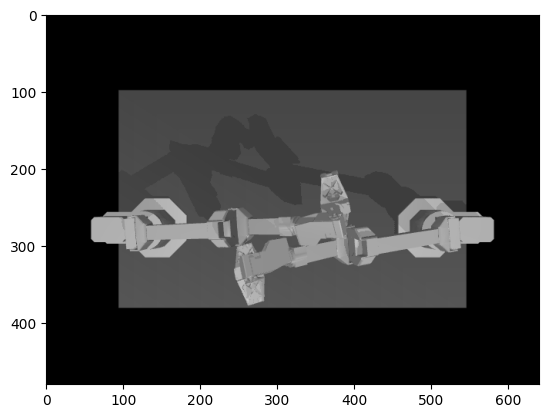

In [65]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

im = Image.fromarray(env.render())
plt.imshow(im)
im.save('my.png')
plt.show()

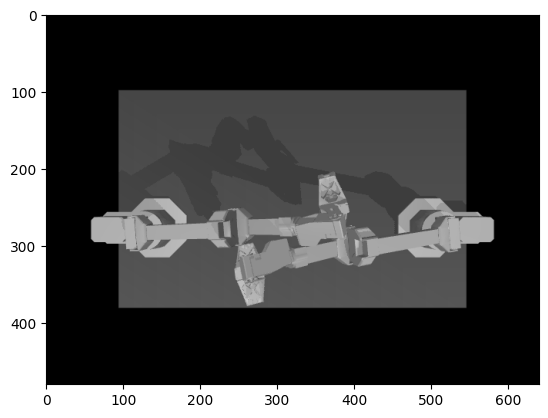

In [49]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

im = Image.fromarray(env.render())
plt.imshow(im)
im.save('my.png')
plt.show()

In [5]:
env.render().shape

(480, 640, 3)

In [ ]:
# to save to an image
arr = np.uint8(observation['pixels']['top'])
image_2d = np.zeros((480*640, 4), dtype='uint8')
row_index = 0
for row in arr:
  for pixel in row:
      image_2d[row_index] = np.uint8(np.append(pixel, 255))
      row_index = row_index + 1

print(image_2d.shape[0] == 640*480)
import json
with open('data.json', 'w') as f:
    json.dump(image_2d.tolist(), f)

In [150]:
env.render()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(480, 640, 3), dtype=uint8)

In [130]:
observation

{'pixels': {'top': array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], shape=(480, 640, 3), dtype=uint8)},
 'agent_pos': array([ 0.        , -0.96      ,  1.16      ,  0

In [132]:
"""Adds NumPy array support to msgpack.

msgpack is good for (de)serializing data over a network for multiple reasons:
- msgpack is secure (as opposed to pickle/dill/etc which allow for arbitrary code execution)
- msgpack is widely used and has good cross-language support
- msgpack does not require a schema (as opposed to protobuf/flatbuffers/etc) which is convenient in dynamically typed
    languages like Python and JavaScript
- msgpack is fast and efficient (as opposed to readable formats like JSON/YAML/etc); I found that msgpack was ~4x faster
    than pickle for serializing large arrays using the below strategy

The code below is adapted from https://github.com/lebedov/msgpack-numpy. The reason not to use that library directly is
that it falls back to pickle for object arrays.
"""

import functools

import msgpack
import numpy as np


def pack_array(obj):
    if (isinstance(obj, (np.ndarray, np.generic))) and obj.dtype.kind in ("V", "O", "c"):
        raise ValueError(f"Unsupported dtype: {obj.dtype}")

    if isinstance(obj, np.ndarray):
        return {
            b"__ndarray__": True,
            b"data": obj.tobytes(),
            b"dtype": obj.dtype.str,
            b"shape": obj.shape,
        }

    if isinstance(obj, np.generic):
        return {
            b"__npgeneric__": True,
            b"data": obj.item(),
            b"dtype": obj.dtype.str,
        }

    return obj


def unpack_array(obj):
    if b"__ndarray__" in obj:
        return np.ndarray(buffer=obj[b"data"], dtype=np.dtype(obj[b"dtype"]), shape=obj[b"shape"])

    if b"__npgeneric__" in obj:
        return np.dtype(obj[b"dtype"]).type(obj[b"data"])

    return obj


Packer = functools.partial(msgpack.Packer, default=pack_array)
packb = functools.partial(msgpack.packb, default=pack_array)

Unpacker = functools.partial(msgpack.Unpacker, object_hook=unpack_array)
unpackb = functools.partial(msgpack.unpackb, object_hook=unpack_array)


In [135]:
packer = Packer()
with open('data.pack', 'wb') as f:
    f.write(packer.pack(image_2d))

In [136]:
unpacker = Unpacker()

In [139]:
with open("data.pack", "rb") as data_file:
    byte_data = data_file.read()
data_loaded = unpackb(byte_data)


In [140]:
data_loaded

array([[  0,   0,   0, 255],
       [  0,   0,   0, 255],
       [  0,   0,   0, 255],
       ...,
       [  0,   0,   0, 255],
       [  0,   0,   0, 255],
       [  0,   0,   0, 255]], shape=(307200, 4), dtype=uint8)

In [145]:
image_2d

array([[  0,   0,   0, 255],
       [  0,   0,   0, 255],
       [  0,   0,   0, 255],
       ...,
       [  0,   0,   0, 255],
       [  0,   0,   0, 255],
       [  0,   0,   0, 255]], shape=(307200, 4), dtype=uint8)

In [146]:
(image_2d == data_loaded).all()

np.True_

In [147]:
im_frame = Image.open('my.png')
np_frame = np.array(im_frame.getdata())

In [153]:
(np_frame.reshape((480, 640, 3)) == observation['pixels']['top']).all()

np.True_

In [22]:
state_list = json.loads("[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]")
state_list == [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]

True

In [23]:
np.array(state_list).shape

(14,)

In [4]:
example = {'prompt': 'do something','images': { }, 'state': np.array(state_list)}

In [6]:
example['images']['cam_high']  = np.array([])
example

{'prompt': 'do something',
 'images': {'cam_high': array([], dtype=float64)},
 'state': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [8]:
result = {'actions': np.array([[ 3.06985906e-03, -7.62168232e-01,  1.11172120e+00,
         -1.94935791e-02, -3.92537578e-01, -3.91067340e-02,
          2.23643718e-01, -3.29584572e-02, -2.83053798e-01,
          9.23404330e-01, -6.76800219e-02, -1.94676964e-01,
          7.17703299e-02,  1.00878814e+00],
        [ 2.67679103e-03, -7.58267993e-01,  1.11159247e+00,
         -1.95932796e-02, -3.87331152e-01, -3.87622161e-02,
          2.26386621e-01, -3.11227204e-02, -2.75945102e-01,
          9.23678370e-01, -6.56526609e-02, -1.96984318e-01,
          8.39174507e-02,  1.01172414e+00],
        [ 2.71519205e-03, -7.66912126e-01,  1.11272093e+00,
         -1.99692155e-02, -3.87671331e-01, -3.62485454e-02,
          2.25921735e-01, -3.09529695e-02, -2.75763649e-01,
          9.24893910e-01, -7.16442669e-02, -1.94572414e-01,
          1.05903626e-01,  1.01958719e+00],
        [ 2.55845565e-03, -7.78277908e-01,  1.11468856e+00,
         -1.97498800e-02, -3.84636398e-01, -3.61206280e-02,
          2.25579288e-01, -3.18804346e-02, -2.66725106e-01,
          9.24760410e-01, -7.38761348e-02, -1.94471386e-01,
          1.10088257e-01,  1.01477490e+00],
        [ 2.43145088e-03, -7.77989677e-01,  1.11615736e+00,
         -1.92271551e-02, -3.84890728e-01, -3.61442232e-02,
          2.20015442e-01, -3.34082841e-02, -2.67193007e-01,
          9.21039598e-01, -7.39278671e-02, -1.99764359e-01,
          1.22750752e-01,  1.01981686e+00],
        [ 2.37497811e-03, -7.79386256e-01,  1.12016162e+00,
         -2.01165422e-02, -3.83325250e-01, -3.50342332e-02,
          2.23029863e-01, -3.34922982e-02, -2.61285295e-01,
          9.20056534e-01, -7.80717688e-02, -2.00982813e-01,
          1.30042618e-01,  1.01249541e+00],
        [ 2.33221389e-03, -7.79503731e-01,  1.11999668e+00,
         -1.98283774e-02, -3.82965849e-01, -3.45053227e-02,
          2.18970652e-01, -3.19580024e-02, -2.60771161e-01,
          9.22486474e-01, -7.22620699e-02, -1.97432572e-01,
          1.36138449e-01,  1.01910767e+00],
        [ 2.36477032e-03, -7.83405289e-01,  1.12201167e+00,
         -1.95023345e-02, -3.81443192e-01, -3.39500966e-02,
          2.22109545e-01, -3.21724562e-02, -2.56054492e-01,
          9.23187500e-01, -7.30402276e-02, -1.99741476e-01,
          1.40452627e-01,  1.01671376e+00],
        [ 2.38606919e-03, -7.88566968e-01,  1.12140683e+00,
         -1.92334562e-02, -3.82375787e-01, -3.33110163e-02,
          2.24714774e-01, -3.32961773e-02, -2.53989336e-01,
          9.21107423e-01, -7.28604303e-02, -1.99661524e-01,
          1.50689357e-01,  1.00834267e+00],
        [ 2.39341828e-03, -7.84059001e-01,  1.12286464e+00,
         -1.97075925e-02, -3.79837973e-01, -3.30685493e-02,
          2.22328313e-01, -3.22925921e-02, -2.51857434e-01,
          9.21893225e-01, -7.58151601e-02, -1.99271999e-01,
          1.47376503e-01,  1.01023216e+00],
        [ 2.37345049e-03, -7.84822427e-01,  1.12261914e+00,
         -1.98494978e-02, -3.78293361e-01, -3.37365683e-02,
          2.21822711e-01, -3.23170443e-02, -2.45131132e-01,
          9.19602741e-01, -7.32099597e-02, -1.95990286e-01,
          1.53424749e-01,  1.01878834e+00],
        [ 2.44223366e-03, -7.89971977e-01,  1.12399269e+00,
         -1.99438320e-02, -3.77734501e-01, -3.15911394e-02,
          2.22075740e-01, -3.31267596e-02, -2.41234076e-01,
          9.17650861e-01, -7.52728300e-02, -2.00923365e-01,
          1.55961806e-01,  1.01772722e+00],
        [ 2.36921908e-03, -7.93708260e-01,  1.12563643e+00,
         -1.93808684e-02, -3.77215452e-01, -3.20689995e-02,
          2.23114586e-01, -3.45487175e-02, -2.34097983e-01,
          9.17463751e-01, -7.64952607e-02, -2.01262349e-01,
          1.58123103e-01,  1.00769532e+00],
        [ 2.40414710e-03, -7.92038063e-01,  1.12545798e+00,
         -1.98050014e-02, -3.77261863e-01, -3.07156629e-02,
          2.21333227e-01, -3.40635429e-02, -2.27800940e-01,
          9.18039677e-01, -7.02930680e-02, -2.02385740e-01,
          1.66187464e-01,  1.01254614e+00],
        [ 2.29350842e-03, -7.91581851e-01,  1.12588474e+00,
         -1.95857569e-02, -3.74836205e-01, -3.19632857e-02,
          2.22707209e-01, -3.50183116e-02, -2.22512045e-01,
          9.17491547e-01, -7.07082397e-02, -2.00854283e-01,
          1.74187278e-01,  1.01026019e+00],
        [ 2.47072824e-03, -7.93711892e-01,  1.12706446e+00,
         -1.99278711e-02, -3.75393084e-01, -3.04352508e-02,
          2.22995338e-01, -3.54183279e-02, -2.17410557e-01,
          9.16809661e-01, -7.13236045e-02, -2.02422720e-01,
          1.81998273e-01,  1.01334905e+00],
        [ 2.33321124e-03, -7.90057946e-01,  1.12810796e+00,
         -1.98879164e-02, -3.74104990e-01, -3.10824158e-02,
          2.20603205e-01, -3.63679723e-02, -2.06911110e-01,
          9.16592251e-01, -6.97631162e-02, -2.03250136e-01,
          1.73017464e-01,  1.01640622e+00],
        [ 2.27860985e-03, -7.94899459e-01,  1.12914742e+00,
         -1.98293123e-02, -3.73568804e-01, -3.09205996e-02,
          2.24151718e-01, -3.75276393e-02, -2.02421648e-01,
          9.14939420e-01, -7.16638971e-02, -2.05507005e-01,
          1.73302197e-01,  1.00841790e+00],
        [ 2.33917067e-03, -8.00947385e-01,  1.12854621e+00,
         -2.00256081e-02, -3.74171202e-01, -3.07949614e-02,
          2.20475551e-01, -3.76901721e-02, -1.97026573e-01,
          9.12953678e-01, -7.51183988e-02, -2.02959343e-01,
          1.78684934e-01,  1.01082981e+00],
        [ 2.36482042e-03, -8.01650095e-01,  1.12828871e+00,
         -1.97522819e-02, -3.72226608e-01, -2.94542285e-02,
          2.23432326e-01, -4.06838444e-02, -1.90165847e-01,
          9.10301021e-01, -7.45660974e-02, -2.03880918e-01,
          1.87907876e-01,  1.01021100e+00],
        [ 2.20469503e-03, -8.01798768e-01,  1.12912361e+00,
         -1.97370656e-02, -3.71544727e-01, -2.95237906e-02,
          2.21579619e-01, -3.97936298e-02, -1.78935670e-01,
          9.08134354e-01, -7.37180620e-02, -2.05614809e-01,
          1.84756196e-01,  1.00717837e+00],
        [ 2.21412746e-03, -8.03247069e-01,  1.13098638e+00,
         -2.04877517e-02, -3.71313296e-01, -2.96207448e-02,
          2.20144318e-01, -4.04299285e-02, -1.72797816e-01,
          9.05881464e-01, -7.35974522e-02, -2.04254955e-01,
          1.86534094e-01,  1.00639761e+00],
        [ 2.23612617e-03, -8.00671249e-01,  1.13151196e+00,
         -2.00009029e-02, -3.71977971e-01, -2.98693640e-02,
          2.21453953e-01, -4.23219427e-02, -1.65376439e-01,
          9.06496849e-01, -7.22441902e-02, -2.06514995e-01,
          1.86571482e-01,  1.01419135e+00],
        [ 2.24504219e-03, -8.03998588e-01,  1.13016878e+00,
         -2.02473841e-02, -3.72009269e-01, -2.92702244e-02,
          2.21596850e-01, -4.26239142e-02, -1.58225185e-01,
          9.03582652e-01, -7.38853091e-02, -2.06382713e-01,
          1.83403649e-01,  1.01066664e+00],
        [ 2.31280412e-03, -8.01401182e-01,  1.13036565e+00,
         -1.98132962e-02, -3.69739470e-01, -2.87389350e-02,
          2.18624887e-01, -4.23263251e-02, -1.47878991e-01,
          9.00466671e-01, -7.50745748e-02, -2.08487902e-01,
          1.85773058e-01,  1.00504266e+00],
        [ 2.26561194e-03, -8.04547434e-01,  1.13331115e+00,
         -2.00992246e-02, -3.69873011e-01, -2.94592805e-02,
          2.19831884e-01, -4.36777840e-02, -1.37123923e-01,
          8.95811434e-01, -7.25006014e-02, -2.09603383e-01,
          1.78175742e-01,  1.00647832e+00],
        [ 2.26760124e-03, -8.02474717e-01,  1.13248785e+00,
         -1.97203601e-02, -3.70470210e-01, -2.98236965e-02,
          2.13094153e-01, -4.39734648e-02, -1.28426880e-01,
          8.93789783e-01, -7.65560579e-02, -2.08024897e-01,
          1.76781210e-01,  1.00716156e+00],
        [ 2.18252984e-03, -8.00847779e-01,  1.13122541e+00,
         -1.96229512e-02, -3.67265983e-01, -2.93944342e-02,
          2.17376955e-01, -4.47405317e-02, -1.20509567e-01,
          8.91477458e-01, -7.41060702e-02, -2.07991255e-01,
          1.77840316e-01,  1.00462545e+00],
        [ 2.12015313e-03, -8.05355421e-01,  1.13312609e+00,
         -1.98973005e-02, -3.69567901e-01, -2.93993287e-02,
          2.14653644e-01, -4.42156796e-02, -1.11135877e-01,
          8.88329637e-01, -7.49181743e-02, -2.07789393e-01,
          1.76649850e-01,  1.00626668e+00],
        [ 2.13487906e-03, -8.04159014e-01,  1.13477486e+00,
         -1.99134186e-02, -3.67856236e-01, -2.90292410e-02,
          2.14624725e-01, -4.57168400e-02, -1.02890618e-01,
          8.86562462e-01, -6.98990582e-02, -2.06428645e-01,
          1.77646513e-01,  1.00771223e+00],
        [ 2.17768029e-03, -8.07106927e-01,  1.13291781e+00,
         -1.92032827e-02, -3.68529864e-01, -2.89320872e-02,
          2.16082582e-01, -4.61118687e-02, -9.57904538e-02,
          8.84413072e-01, -7.32693659e-02, -2.08102673e-01,
          1.74507684e-01,  1.00361515e+00],
        [ 2.12318449e-03, -8.06353712e-01,  1.13379652e+00,
         -1.91047928e-02, -3.68111102e-01, -2.92118691e-02,
          2.12858172e-01, -4.54141847e-02, -8.80526684e-02,
          8.81848400e-01, -7.12914398e-02, -2.06781827e-01,
          1.76040276e-01,  1.00958418e+00],
        [ 2.22767953e-03, -8.08698984e-01,  1.13239624e+00,
         -1.93531905e-02, -3.65133246e-01, -2.80555184e-02,
          2.16357144e-01, -4.57012359e-02, -7.86313220e-02,
          8.79552073e-01, -7.17237566e-02, -2.08220674e-01,
          1.75069316e-01,  1.00926688e+00],
        [ 2.07237595e-03, -8.08143491e-01,  1.13401229e+00,
         -1.90913717e-02, -3.66612675e-01, -2.88651614e-02,
          2.15082354e-01, -4.60162227e-02, -7.05929022e-02,
          8.75655781e-01, -7.31666514e-02, -2.10471209e-01,
          1.71441203e-01,  1.01047164e+00],
        [ 2.21808294e-03, -8.10863136e-01,  1.13332170e+00,
         -1.85846270e-02, -3.65395335e-01, -2.78437441e-02,
          2.14844040e-01, -4.70412861e-02, -6.62133299e-02,
          8.75992679e-01, -7.47939698e-02, -2.10871392e-01,
          1.72838195e-01,  1.00834868e+00],
        [ 2.15995152e-03, -8.07659902e-01,  1.13658636e+00,
         -1.90566592e-02, -3.64775670e-01, -2.83702442e-02,
          2.15403577e-01, -4.59818361e-02, -5.35844965e-02,
          8.74211309e-01, -7.38546917e-02, -2.07777186e-01,
          1.74865186e-01,  1.00754477e+00],
        [ 2.16760891e-03, -8.05782834e-01,  1.13471258e+00,
         -1.90177580e-02, -3.63050458e-01, -2.81810936e-02,
          2.18492419e-01, -4.60176939e-02, -4.82461921e-02,
          8.72252481e-01, -7.21914732e-02, -2.10876887e-01,
          1.74087576e-01,  1.00759355e+00],
        [ 2.17178483e-03, -8.09117729e-01,  1.13681759e+00,
         -1.90835788e-02, -3.64812202e-01, -2.77512852e-02,
          2.14663964e-01, -4.59573084e-02, -4.21172767e-02,
          8.72716432e-01, -7.20575162e-02, -2.07869824e-01,
          1.75309734e-01,  1.00391124e+00],
        [ 2.18830275e-03, -8.07151214e-01,  1.13665281e+00,
         -1.91333725e-02, -3.62097136e-01, -2.81643306e-02,
          2.17163475e-01, -4.54585999e-02, -3.53900720e-02,
          8.69611473e-01, -7.38135246e-02, -2.08847427e-01,
          1.75264026e-01,  1.00786179e+00],
        [ 2.19564105e-03, -8.10197568e-01,  1.13758574e+00,
         -1.88843984e-02, -3.64098591e-01, -2.86565905e-02,
          2.14481955e-01, -4.61632693e-02, -2.85859853e-02,
          8.67390321e-01, -7.50114644e-02, -2.09859087e-01,
          1.73755161e-01,  1.00428989e+00],
        [ 2.17740898e-03, -8.11355428e-01,  1.13613363e+00,
         -1.86200592e-02, -3.64052275e-01, -2.78223755e-02,
          2.13986017e-01, -4.66454935e-02, -2.18170680e-02,
          8.65841506e-01, -7.55507156e-02, -2.10022531e-01,
          1.74594502e-01,  1.00333660e+00],
        [ 2.17115204e-03, -8.10221177e-01,  1.13653920e+00,
         -1.88447389e-02, -3.62872686e-01, -2.85147040e-02,
          2.13852601e-01, -4.76193496e-02, -1.77610164e-02,
          8.65040632e-01, -7.60909982e-02, -2.11033195e-01,
          1.76309277e-01,  1.00840153e+00],
        [ 2.12550830e-03, -8.08744779e-01,  1.13612230e+00,
         -1.92833023e-02, -3.62008173e-01, -2.76995469e-02,
          2.14725083e-01, -4.75147439e-02, -1.28714435e-02,
          8.64699223e-01, -7.39776146e-02, -2.10944042e-01,
          1.71570913e-01,  1.00396662e+00],
        [ 2.13136753e-03, -8.11263651e-01,  1.13817566e+00,
         -1.88348391e-02, -3.62002774e-01, -2.77576396e-02,
          2.09355955e-01, -4.70237250e-02, -6.56668091e-03,
          8.62402963e-01, -7.27093906e-02, -2.09130024e-01,
          1.77216856e-01,  1.00119605e+00],
        [ 2.14237999e-03, -8.09931797e-01,  1.13919992e+00,
         -1.95083239e-02, -3.62895368e-01, -2.73164458e-02,
          2.12480808e-01, -4.87222465e-02,  7.94099282e-04,
          8.60992444e-01, -7.43947242e-02, -2.10399435e-01,
          1.73768336e-01,  1.00469331e+00],
        [ 2.07845716e-03, -8.09993405e-01,  1.13906032e+00,
         -1.93454996e-02, -3.63321552e-01, -2.86490073e-02,
          2.11872496e-01, -4.84431003e-02,  4.89785159e-03,
          8.60882267e-01, -7.34541801e-02, -2.09209755e-01,
          1.64922707e-01,  1.00120749e+00],
        [ 2.09543676e-03, -8.12421186e-01,  1.13716921e+00,
         -1.85823933e-02, -3.63505258e-01, -2.87188740e-02,
          2.12922847e-01, -4.89161195e-02,  1.03348290e-02,
          8.59501239e-01, -7.69869368e-02, -2.11026225e-01,
          1.74106869e-01,  9.98633446e-01],
        [ 2.14138572e-03, -8.13125334e-01,  1.13801277e+00,
         -1.89649364e-02, -3.62025067e-01, -2.85832683e-02,
          2.11817886e-01, -4.93458695e-02,  1.24520344e-02,
          8.58343752e-01, -7.41899048e-02, -2.07910630e-01,
          1.75499912e-01,  9.96792560e-01],
        [ 2.19687964e-03, -8.10646654e-01,  1.13772324e+00,
         -1.89381796e-02, -3.62157154e-01, -2.73737823e-02,
          2.14105211e-01, -4.95104647e-02,  1.88066593e-02,
          8.57046301e-01, -7.89554698e-02, -2.08995253e-01,
          1.71802687e-01,  9.93452814e-01],
        [ 2.33976260e-03, -8.10535260e-01,  1.13830747e+00,
         -1.90849796e-02, -3.61209196e-01, -2.80056811e-02,
          2.09926779e-01, -4.87510811e-02,  2.09184316e-02,
          8.56300684e-01, -7.40828766e-02, -2.09021197e-01,
          1.75415165e-01,  9.83988596e-01]])}

In [9]:
result['actions'].shape

(50, 14)

In [12]:
len(result['actions'].tolist())

50

In [14]:
import json

In [15]:
json.dumps(result['actions'].tolist())

'[[0.00306985906, -0.762168232, 1.1117212, -0.0194935791, -0.392537578, -0.039106734, 0.223643718, -0.0329584572, -0.283053798, 0.92340433, -0.0676800219, -0.194676964, 0.0717703299, 1.00878814], [0.00267679103, -0.758267993, 1.11159247, -0.0195932796, -0.387331152, -0.0387622161, 0.226386621, -0.0311227204, -0.275945102, 0.92367837, -0.0656526609, -0.196984318, 0.0839174507, 1.01172414], [0.00271519205, -0.766912126, 1.11272093, -0.0199692155, -0.387671331, -0.0362485454, 0.225921735, -0.0309529695, -0.275763649, 0.92489391, -0.0716442669, -0.194572414, 0.105903626, 1.01958719], [0.00255845565, -0.778277908, 1.11468856, -0.01974988, -0.384636398, -0.036120628, 0.225579288, -0.0318804346, -0.266725106, 0.92476041, -0.0738761348, -0.194471386, 0.110088257, 1.0147749], [0.00243145088, -0.777989677, 1.11615736, -0.0192271551, -0.384890728, -0.0361442232, 0.220015442, -0.0334082841, -0.267193007, 0.921039598, -0.0739278671, -0.199764359, 0.122750752, 1.01981686], [0.00237497811, -0.7793862